# Regression of a very complex function
In this task you will learn how to perform a regression of a very complex function.

## Imports and Seeding
First we will do the necessary imports:
* `numpy` for general data handling and array manipulation
* `tensorflow` to build and train the regression model
* `matplotlib.pyplot` for plotting

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Then we set a random seed for the `np.random` module. This makes our code reproducible as the random operations will yield the same results in every run through the notebook.

In [2]:
np.random.seed(42)

## Data Creation
First we define the parameters of the data.
* `n_data`: number of data points
* `uncertainty`: the uncertainty that is used

In [3]:
n_data = 10 ** 4
uncertainty = 0.0

We define `some_complicated_function` that we want to regress and model with our neural network.

In [4]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
    ) / (0.5 + np.abs(np.cos(x)))

And now we create the training data according to `some_complicated_function`.

In [5]:
x_lin = np.linspace(-10, 10, 1000)[:, None]
y_lin = some_complicated_function(x_lin)

x = np.random.uniform(-10, 10, size=(n_data,1))
y = some_complicated_function(x)
y += np.random.normal(0, uncertainty, size=y.shape[0])[..., None]

## Data Visualization
Visualize the used function (`some_complicated_function`) andd the created data `(x, y)` in an appropriate way.

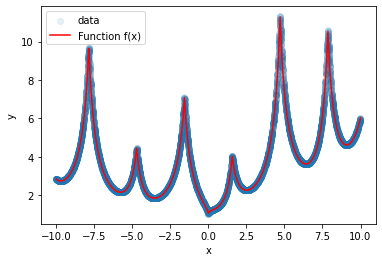

In [6]:
"""
TODO: Visualize, x, y, x_lin, y_lin
"""
plt.scatter(x, y, label="data", alpha=0.1)
plt.plot(x_lin, y_lin, label="Function f(x)", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Model Setup
Now create the model:
- What is a suitable size?
- How many inputs and outputs are needed?
- What are suitable activations? 

In [7]:
"""
TODO: Create the model
"""
model = tf.keras.Sequential(
    layers=[
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

2022-08-08 11:32:53.527919: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now compile the model:
- Which loss function should be used? ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses))
- Which optimizer should be used?

In [8]:
"""
TODO: Compile the model
"""
model.compile(loss="mse", optimizer="sgd")

## Model Training
Now train the model:
* What is a suitable number of epochs?
* What is a suitable size for the batches?

In [9]:
"""
TODO: Train the model
"""
model.fit(x, y, epochs=100)

2022-08-08 11:32:53.706288: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
313/313 [==============================] - 1s 955us/step - loss: 3.3028
Epoch 2/100
313/313 [==============================] - 0s 839us/step - loss: 2.7055
Epoch 3/100
313/313 [==============================] - 0s 929us/step - loss: 2.4204
Epoch 4/100
313/313 [==============================] - 0s 931us/step - loss: 2.5067
Epoch 5/100
313/313 [==============================] - 0s 931us/step - loss: 2.3120
Epoch 6/100
313/313 [==============================] - 0s 794us/step - loss: 2.1447
Epoch 7/100
313/313 [==============================] - 0s 851us/step - loss: 1.9975
Epoch 8/100
313/313 [==============================] - 0s 827us/step - loss: 1.9595
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 1.8596
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 1.8555
Epoch 11/100
313/313 [==============================] - 0s 1ms/step - loss: 1.7545
Epoch 12/100
313/313 [==============================] - 0s 1ms/step - loss: 1.73

313/313 [==============================] - 1s 3ms/step - loss: 1.0651
Epoch 99/100
313/313 [==============================] - 0s 1ms/step - loss: 1.0816
Epoch 100/100
313/313 [==============================] - 0s 1ms/step - loss: 1.0420


## Model Evaluation
Visualize the model prediction alogn with the original function and the training data. What do you observe?

In [10]:
"""
TODO: what does the model predict for each x value?
"""
y_pred = model.predict(x_lin)

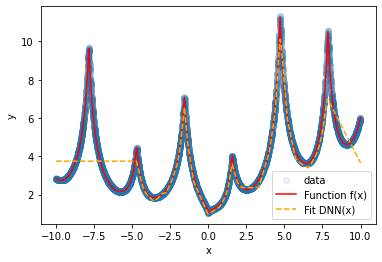

In [11]:
"""
TODO: Plot model prediction along with the original function and the training data
"""
plt.scatter(x, y, label="data", alpha=0.1)
plt.plot(x_lin, y_lin, label="Function f(x)", color="red")
plt.plot(x_lin, y_pred, linestyle="--", label="Fit DNN(x)", color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fit.pdf")

## Model Improvements
Try to improve your model and its training. You may try the following configurations.
- Different activation functions (ReLU, Sigmoid, Thanh)
- Different learning rates (0.0001, 0.001, 0.01 ,0.1, 1, 10)

Describe your observations.

## Further Tasks
Go back to the beginning of the notebook and increase the uncertainty of the data.
Describe your observations.

## Summary
This concludes our tutorial on the regression of a very complicated function.

In this tutorial you have learned:
* How to perform a regression with a neural network
* The limits of very simple neural networks
* The limits of very simple optimizers
* How to improve:
    * the network 
    * the optimization of the network
* The influence of uncertain data on the model training